[217.169363, 95.234496, 59.691119]
[241.295087, 97.834084, 60.468013]
[70.17046888041793, 0.9459647322176025, 0.10013842360879992]
[7.888021999999978, 1.1936250000000115, 0.4087990000000019] [16.237702000000013, 1.4059629999999999, 0.36809499999999673]


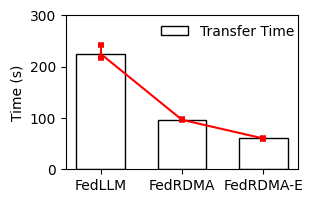

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# 数据
fedllm_list=[i*2/1000*5  for i in [21716.9363, 22134.2520, 22320.2314,24129.5087, 22227.7641]]
fedrdma_e_list=[i*2/1000*5 for i in [6002.4707, 6046.2594, 6046.8013, 5969.1119, 5985.3157]]
fedrdma_list=[i*2/1000*5  for i in [9783.4084, 9619.1792, 9723.7679, 9523.4496, 9564.2554]]
print([min(fedllm_list),min(fedrdma_list),min(fedrdma_e_list)])
print([max(fedllm_list),max(fedrdma_list),max(fedrdma_e_list)])

fedllm_var=np.var(fedllm_list)
fedrdma_var=np.var(fedrdma_list)
fedrdma_e_var=np.var(fedrdma_e_list)


print([fedllm_var,fedrdma_var,fedrdma_e_var])
fedllm=sum(fedllm_list)/len(fedllm_list)
fedrdma=sum(fedrdma_list)/len(fedrdma_list)
fedrdma_e=sum(fedrdma_e_list)/len(fedrdma_e_list)
x_labels = ['FedLLM', 'FedRDMA', 'FedRDMA-E']
# 创建图形和轴对象

fig, ax1 = plt.subplots(figsize = (3,2))
print([fedllm - min(fedllm_list),
     fedrdma - min(fedrdma_list),
     fedrdma_e - min(fedrdma_e_list)],
    [max(fedllm_list) - fedllm,
     max(fedrdma_list)-fedrdma,
     max(fedrdma_e_list)-fedrdma_e])

width=0.6

ax1.bar(x_labels, [fedllm,fedrdma,fedrdma_e],width=width,edgecolor='black',color='none', label='Transfer Time')
# ax1.bar(x_labels, [fedllm,fedrdma,fedrdma_e], yerr=[fedllm_var,fedrdma_var,fedrdma_e_var],width=width,edgecolor='black',color='none', label='Total Time',capsize=10)
ax1.errorbar(x_labels,[fedllm,fedrdma,fedrdma_e],yerr=[
    [fedllm - min(fedllm_list),
     fedrdma - min(fedrdma_list),
     fedrdma_e - min(fedrdma_e_list)],
    [max(fedllm_list) - fedllm,
     max(fedrdma_list)-fedrdma,
     max(fedrdma_e_list)-fedrdma_e]],capsize=2.5,capthick=4,color='red')
# for i,num in enumerate([fedllm,fedrdma,fedrdma_e]):
#     ax1.text(i,num,str(round(num,1)),ha='center',va='bottom')

# 添加标签和刻度

# ax1.set_xlabel('Method')
ax1.set_ylabel('Time (s)')
ax1.set_ylim(0,300)
# ax1.tick_params(axis='y')

# 添加图例
fig.legend(loc='center left', bbox_to_anchor=(0.4, 0.8),fontsize='medium',frameon=False)

# 显示图形

plt.savefig(r"D:\FATE-RDMA论文\FedRDMA\figs\eval_transfer_latency.pdf", bbox_inches='tight', pad_inches=0)
plt.show()